In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

#首先构建初步寻找聚类中心（centroids，质心）函数，
#再随机设置初始质心，通过欧氏距离初步判断X的每一个变量属于哪个质心
def find_closest_centroids(X,centroids):
    m = X.shape[0]
    k = centroids.shape[0] #聚类中心数量
    idx = np.zeros(m)
    
    for i in range(m): #计算所有点到各个聚类中显得距离，存于数组idx
        min_dist = 1000000 
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx
data = loadmat('D:\ex7data2.mat')
X = data['X']

def init_centroids(X,k):#随机选择聚类中心
    m,n = X.shape
    centroids = np.zeros((k,n))
    idx = np.random.randint(0,m,k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    return centroids

initial_centroids = init_centroids(X,3)

idx = find_closeset_centroids(X,initial_centroids)
idx[0:3]

array([ 1.,  1.,  1.])

In [53]:
#迭代
def compute_centroids(X,idx,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:],axis=1)/len(indices[0])).ravel()
    return centroids
compute_centroids(X,idx,3)

C:\Users\dell_pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


array([[        nan,         nan],
       [ 3.68437558,  2.9871008 ],
       [        nan,         nan]])

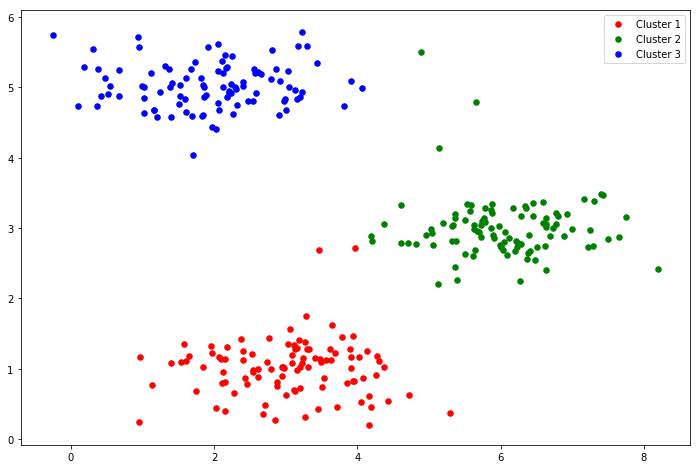

In [54]:
#画图
def run_k_means(X,initial_centroids,max_iters):
    m,n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,k)
    
    return idx,centroids
idx,centroids = run_k_means(X,initial_centroids,10)
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='red',label='Cluster 1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='green',label='Cluster 2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='blue',label='Cluster 3')
ax.legend()
plt.show()